In [1]:
import os

import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
import dionysus as dion
import sklearn_tda as tda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pt_activation.models.simple_mnist import CFF

Cython not found--SlicedWassersteinKernel, PersistenceWeightedGaussianKernel and PersistenceScaleSpaceKernel not available
Cython not found--WassersteinDistance and SlicedWassersteinDistance not available
Gudhi not found--GraphInducedComplex not available


In [2]:
%load_ext autoreload
%autoreload 2
BATCH_SIZE = 50
UP_TO = 5000

In [3]:
torch.manual_seed(1)

In [4]:
kwargs = {'num_workers': 1, 'pin_memory': True}
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])), batch_size=BATCH_SIZE, shuffle=False, **kwargs)

In [5]:
model_path = '/home/tgebhart/projects/pt_activation/logdir/models/cff_5-filters_5-kernel_size_50-fc1_relu-activation.pt'

In [6]:
device = torch.device("cpu")
model = CFF().to(device)
model.load_state_dict(torch.load(model_path))

In [7]:
model.eval()
test_loss = 0
correct = 0
t = 0
res_df = []
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output, arr = model(data)
        test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
        pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        filtrations = model.compute_dynamic_filtration_batch(data, arr)
        for i in range(len(filtrations)):
            print('filtration: ', i+t)
            m = dion.homology_persistence(filtrations[i])
            dgms = dion.init_diagrams(m, filtrations[i])
            LS = tda.Landscape(resolution = 100, num_landscapes=10)
            diags = np.array([[pt.death,pt.birth] for pt in dgms[0]])
            diags[np.isinf(diags)] = np.partition(diags.flatten(), -2)[-2]
            L = LS.fit_transform([diags])
            row = {'diagrams':dgms, 'loss':output.numpy()[i][0], 'class':target.numpy()[i], 'prediction':pred.numpy()[i][0], 'landscape':L}
            res_df.append(row)
        t += BATCH_SIZE
        if t >= UP_TO:
            break

Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60501
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73028
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 49163
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 82140
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63674
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 51891
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66887
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63375
Sorting filtration...
Filtration: 8
to

filtration size 67232
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78190
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 59813
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68015
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78061
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 55863
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72351
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69720
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 86729
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65236
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 55354
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70607
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69622
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62130
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 81659
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72657
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 50727
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76566
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61376
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 85109
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72410
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67621
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 84918
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78311
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 72672
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77683
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79542
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66607
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61407
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71746
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 89513
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65259
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration:  4
filtration:  5
filtration:  6
filtration:  7
filtration:  8
filtration:  9
filtration:  10
filtration:  11
filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61375
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77853
Sorting filtration...
Filtration: 2
torch.Size

filtration size 51330
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72385
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79142
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 47411
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 58405
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72888
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68469
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74140
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration si

filtration size 60475
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61489
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53596
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64491
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72538
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 48326
Sorting filtration...
Filtration: 20
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 58780
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74678
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 79742
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 87399
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56074
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72314
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67409
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71125
Sorting filtration...
Filtration: 30
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 50579
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66253
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 72307
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72640
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65647
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53377
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64473
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 84162
Sorting filtration...
Filtration: 40
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 80052
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70344
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 70377
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70150
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76689
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74081
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64631
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70061
Sorting filtration...
filtration:  0
filtration:  1
filtration:  2
filtration:  3
filtration:  4
filtration:  5
filtration:  6
filtration:  7
filtration:  8
filtration:  9
filtration:  10
filtration:  11
filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration

filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64322
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70214
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 52367
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70453
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 81881
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 91039
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) t

filtration size 68022
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74951
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 85207
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 82018
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64860
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73832
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76945
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 84008
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtratio

filtration size 55031
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67542
Sorting filtration...
Filtration: 20
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76578
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69446
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 52201
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60722
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 57350
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74542
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 73356
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68438
Sorting filtration...
Filtration: 30
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66058
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53346
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61939
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65525
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65954
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 50044
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 76350
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 50576
Sorting filtration...
Filtration: 40
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69466
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69673
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 80629
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66881
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 98180
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79752
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 49871
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53906
Sorting filtration...
filtration:  0
filtration:  1
filtration:  2
filtration:  3
filtration:  4
filtration:  5
filtration:  6
filtration:  7
filtration:  8
filtration:  9
filtration:  10
filtration:  11
filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch

filtration size 73228
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 92442
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 54564
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62287
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60992
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66463
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53764
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78731
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size

filtration size 60076
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65909
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71179
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 86447
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66081
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66783
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61681
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 94462
Sorting filtration...
Filtration: 20
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 51983
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78393
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64458
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68483
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67778
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68037
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 85674
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 59401
Sorting filtration...
Filtration: 30
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 81664
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69496
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66756
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74601
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65514
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73941
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74716
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 49090
Sorting filtration...
Filtration: 40
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 55104
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66181
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61220
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75138
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75077
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79260
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74940
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74087
Sorting filtration...
filtration:  0
filtration:  1
filtration:  2
filtration:  3
filtration:  4
filtration:  

filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64576
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63372
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 55986
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 85040
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67020
Sorting filtration...
Filtration: 5
tor

filtration size 62401
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 50444
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 55701
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 50040
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 55846
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74705
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65163
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72266
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration

filtration size 70906
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70072
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78186
Sorting filtration...
Filtration: 20
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70760
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72947
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78439
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70008
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 54208
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 66401
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 58870
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78020
Sorting filtration...
Filtration: 30
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 81812
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63634
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66300
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 51516
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 48287
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 67153
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63963
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68957
Sorting filtration...
Filtration: 40
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56099
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71181
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65018
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74541
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60244
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 59972
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 85964
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67187
Sorting filtration...
filtration:  0
filtration:  1
filtration:  2
filtration:  3
filtration:  4
filtration:  5
filtration:  6
filtration:  7
filtration:  8
filtration:  9
filtration:  10
filtration:  11
filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  4

filtration size 67374
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62320
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72642
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73599
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66807
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66648
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 48946
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65924
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 

filtration size 74086
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 82334
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75568
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68676
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 51230
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 50214
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79882
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75447
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 71745
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67087
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 54032
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74922
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71348
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56094
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72925
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62988
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 76615
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66549
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69028
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 55524
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 47964
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 51373
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62541
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56613
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 79904
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 90832
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 82595
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62385
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 93276
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 86443
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 49308
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75492
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 57718
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60294
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62264
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66339
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.S

filtration size 86721
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67933
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64813
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77459
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 52218
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61921
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65375
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 50536
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration 

filtration size 66459
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69980
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75700
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77731
Sorting filtration...
Filtration: 20
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61370
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 49953
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79971
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74899
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 70444
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77667
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68727
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77485
Sorting filtration...
Filtration: 30
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77041
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62163
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62744
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71015
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 80032
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62158
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 87310
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 58915
Sorting filtration...
Filtration: 40
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70162
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75140
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79460
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72669
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 66184
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 80551
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74363
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70863
Sorting filtration...
filtration:  0
filtration:  1
filtration:  2
filtration:  3
filtration:  4
filtration:  5
filtration:  6
filtration:  7
filtration:  8
filtration:  9
filtration:  10
filtration:  11
filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
fi

filtration size 76954
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56151
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53245
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70328
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 98416
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73224
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61596
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60578
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 

filtration size 65137
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 57769
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66163
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77991
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68479
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65244
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 54085
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65033
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 74868
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 51956
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66700
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75052
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64409
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74092
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56089
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70384
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 54656
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77139
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67840
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63530
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 59865
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78653
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71348
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65629
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 87581
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 52845
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76797
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78198
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60292
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77819
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67383
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68060
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration:  7
filtration:  8
filtration:  9
filtration:  10
filtration:  11
filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77701
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70158
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size(

filtration size 61773
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 51700
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76301
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78472
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69281
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 59626
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70213
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 50843
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration si

filtration size 82632
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68425
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 83813
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77696
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77155
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53494
Sorting filtration...
Filtration: 20
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63915
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72234
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 84175
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71461
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66779
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70894
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63659
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 84857
Sorting filtration...
Filtration: 30
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 88132
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69296
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 81042
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65447
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64639
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65942
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73795
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 86072
Sorting filtration...
Filtration: 40
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68668
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63797
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 85326
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78017
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 88569
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68519
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61340
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77644
Sorting filtration...
filtration:  0
filtration:  1
filtration:  2
filtration:  3
filtration:  4
filtration:  5
filtration:  6
filtration:  7
filtration:  8
filtration:  9
filtration:  10
filtration:  11
filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration

filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 54173
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74528
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 82211
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74467
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72458
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 84993
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) t

filtration size 66080
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 55724
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67541
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66601
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68192
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 87529
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 48753
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77042
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtratio

filtration size 73280
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73689
Sorting filtration...
Filtration: 20
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 52438
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75767
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70961
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73690
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69694
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68970
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 69326
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78127
Sorting filtration...
Filtration: 30
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68012
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64416
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69402
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68917
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79529
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61724
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 66391
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56939
Sorting filtration...
Filtration: 40
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65878
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68236
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 58466
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67024
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60434
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79112
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 67812
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71783
Sorting filtration...
filtration:  0
filtration:  1
filtration:  2
filtration:  3
filtration:  4
filtration:  5
filtration:  6
filtration:  7
filtration:  8
filtration:  9
filtration:  10
filtration:  11
filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch

filtration size 58906
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64313
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 59291
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64419
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 81124
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76878
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70672
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60273
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size

filtration size 72901
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68255
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 106977
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 55272
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61872
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 88655
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78785
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 57489
Sorting filtration...
Filtration: 20
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrat

filtration size 89682
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60739
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68597
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 58727
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68559
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64570
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 59241
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63184
Sorting filtration...
Filtration: 30
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 70672
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75482
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76613
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67914
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73443
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72261
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 86848
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73491
Sorting filtration...
Filtration: 40
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 85395
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73470
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62638
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77988
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 51665
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 81868
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69089
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 82917
Sorting filtration...
filtration:  0
filtration:  1
filtration:  2
filtration:  3
filtration:  4
filtration:  

filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75769
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56709
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 87363
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78273
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.S

filtration size 67874
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 82157
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73331
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66612
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 85073
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66826
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 85670
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65493
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration 

filtration size 68105
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63604
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56067
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56992
Sorting filtration...
Filtration: 20
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70734
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 58939
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71141
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75916
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 69307
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 48456
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73713
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 51756
Sorting filtration...
Filtration: 30
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76718
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70795
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 80285
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76720
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 72764
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71023
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63063
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77450
Sorting filtration...
Filtration: 40
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71681
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 85750
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67902
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 49040
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 66014
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63795
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66887
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74568
Sorting filtration...
filtration:  0
filtration:  1
filtration:  2
filtration:  3
filtration:  4
filtration:  5
filtration:  6
filtration:  7
filtration:  8
filtration:  9
filtration:  10
filtration:  11
filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
fi

filtration size 65420
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66684
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70846
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69843
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73213
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65474
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75231
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70408
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 

filtration size 50098
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 82958
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72668
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63703
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53032
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72917
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 59933
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66456
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 88616
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68990
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62565
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62970
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 50281
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77683
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63760
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 52732
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 68344
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67248
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66567
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73309
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66644
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60786
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 76840
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69180
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 50204
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 48940
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66223
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68103
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60226
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53368
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69723
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62418
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75711
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68124
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66673
Sorting filtration...
Filtration: 3
torch.Siz

filtration size 85247
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65215
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69211
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 50541
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65310
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63860
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67795
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 58383
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration s

filtration size 75743
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69877
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69432
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68457
Sorting filtration...
Filtration: 19
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56233
Sorting filtration...
Filtration: 20
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66522
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71651
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77699
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 75991
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 58451
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67904
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 49018
Sorting filtration...
Filtration: 29
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 80226
Sorting filtration...
Filtration: 30
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75758
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 61997
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68461
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 76789
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79691
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73454
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67656
Sorting filtration...
Filtration: 39
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68081
Sorting filtration...
Filtration: 40
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69789
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53410
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 63295
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 66284
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71937
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65754
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 80735
Sorting filtration...
Filtration: 49
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70569
Sorting filtration...
filtration:  0
filtration:  1
filtration:  2
filtration:  3
filtration:  4
filtration:  5
filtration:  6
filtration:  7
filtration:  8
filtration:  9
filtration:  10
filtration:  11
filtration:  12
filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtra

Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72267
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 86191
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 53553
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 56351
Sorting filtration...
Filtration: 4
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 100397
Sorting filtration...
Filtration: 5
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69293
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 48913
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68061
Sorting filtration...
Filtration: 8
t

filtration size 66264
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 65519
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78884
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66052
Sorting filtration...
Filtration: 14
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66676
Sorting filtration...
Filtration: 15
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 57572
Sorting filtration...
Filtration: 16
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71705
Sorting filtration...
Filtration: 17
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 87717
Sorting filtration...
Filtration: 18
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 75332
Sorting filtration...
Filtration: 21
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 58526
Sorting filtration...
Filtration: 22
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60131
Sorting filtration...
Filtration: 23
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 72841
Sorting filtration...
Filtration: 24
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 98833
Sorting filtration...
Filtration: 25
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 68463
Sorting filtration...
Filtration: 26
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 69119
Sorting filtration...
Filtration: 27
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62150
Sorting filtration...
Filtration: 28
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 68782
Sorting filtration...
Filtration: 31
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62586
Sorting filtration...
Filtration: 32
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64636
Sorting filtration...
Filtration: 33
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67173
Sorting filtration...
Filtration: 34
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67459
Sorting filtration...
Filtration: 35
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78876
Sorting filtration...
Filtration: 36
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 64536
Sorting filtration...
Filtration: 37
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 77909
Sorting filtration...
Filtration: 38
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration size 63378
Sorting filtration...
Filtration: 41
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71417
Sorting filtration...
Filtration: 42
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75528
Sorting filtration...
Filtration: 43
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 62784
Sorting filtration...
Filtration: 44
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 78211
Sorting filtration...
Filtration: 45
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 70871
Sorting filtration...
Filtration: 46
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 67273
Sorting filtration...
Filtration: 47
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 51286
Sorting filtration...
Filtration: 48
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtrati

filtration:  13
filtration:  14
filtration:  15
filtration:  16
filtration:  17
filtration:  18
filtration:  19
filtration:  20
filtration:  21
filtration:  22
filtration:  23
filtration:  24
filtration:  25
filtration:  26
filtration:  27
filtration:  28
filtration:  29
filtration:  30
filtration:  31
filtration:  32
filtration:  33
filtration:  34
filtration:  35
filtration:  36
filtration:  37
filtration:  38
filtration:  39
filtration:  40
filtration:  41
filtration:  42
filtration:  43
filtration:  44
filtration:  45
filtration:  46
filtration:  47
filtration:  48
filtration:  49
Filtration: 0
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60527
Sorting filtration...
Filtration: 1
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 60894
Sorting filtration...
Filtration: 2
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 66808
Sorting filtration...
Filtration: 3
torch.Size([50, 2880]) to

filtration size 59667
Sorting filtration...
Filtration: 6
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 74839
Sorting filtration...
Filtration: 7
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 79886
Sorting filtration...
Filtration: 8
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 84352
Sorting filtration...
Filtration: 9
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 75008
Sorting filtration...
Filtration: 10
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 90801
Sorting filtration...
Filtration: 11
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 73127
Sorting filtration...
Filtration: 12
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration size 71867
Sorting filtration...
Filtration: 13
torch.Size([50, 2880]) torch.Size([50, 50]) torch.Size([50, 10])
filtration s

In [8]:
res_df = pd.DataFrame(res_df)
res_df.head()

,class,diagrams,landscape,loss,prediction
0,7,"[((8.0098,inf), (6.23636,4.14763), (5.54833,3....","[[0.0, 0.10320836565666756, 0.2064167313133351...",-25.141973,7
1,2,"[((9.19257,inf), (7.93303,6.76114), (7.21367,5...","[[0.0, 0.11507190399953979, 0.2073131973355163...",-25.512363,2
2,1,"[((6.76636,inf), (6.72046,3.63787), (5.50333,3...","[[0.0, 0.08458617401271508, 0.1691723480254301...",-17.949253,1
3,0,"[((8.56459,inf), (7.27502,5.17696), (6.79367,5...","[[0.0, 0.10639231314073501, 0.2127846262814700...",0.000000,0
4,4,"[((6.68749,inf), (5.94875,3.65583), (5.90222,4...","[[0.0, 0.0, 0.0, 6.885262433992688e-05, 0.0, 0...",-28.701509,4


In [9]:
misses = res_df[res_df['class'] != res_df['prediction']]

In [10]:
misses

,class,diagrams,landscape,loss,prediction
115,4,"[((4.8612,inf), (4.65706,3.41586), (4.17171,3....","[[0.0, 0.0554628609131151, 0.1109257218262302,...",-22.958006,9
247,4,"[((13.2918,inf), (8.91031,8.50719), (6.51967,5...","[[0.0, 0.17568732698035308, 0.3513746539607061...",-20.450085,2
340,5,"[((8.36765,inf), (6.03937,5.61093), (6.00097,3...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",-26.124838,3
445,6,"[((8.82505,inf), (7.81457,5.95598), (7.65117,5...","[[0.0, 0.06055050235943136, 0.0378136032977662...",-0.023880,0
449,3,"[((9.77649,inf), (8.55875,6.20341), (7.03312,6...","[[0.0, 0.0761668974164403, 0.0, 0.0, 0.0, 0.00...",-47.204582,5
582,8,"[((8.74709,inf), (8.29071,6.84113), (6.36997,5...","[[0.0, 0.11197650576701647, 0.2239530115340329...",-20.413567,2
583,2,"[((9.18585,inf), (6.92669,5.85161), (6.84187,6...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05...",-34.306755,7
646,2,"[((6.88059,inf), (5.24889,4.87587), (4.3319,4....","[[0.0, 0.0860829482413805, 0.02901787019914057...",-9.034416,6
659,2,"[((8.79649,inf), (8.09,5.4813), (7.11465,5.518...","[[0.0, 0.11023349347177228, 0.2204669869435445...",-24.248026,1
720,5,"[((10.127,inf), (9.06114,7.15327), (7.03406,6....","[[0.0, 0.022480234120200043, 0.0, 0.0, 0.0, 0....",-24.941895,8


In [11]:
class_landscapes = []
for i in range(10):
    cls_df = res_df[res_df['class'] == i]
    class_landscapes.append(np.mean(cls_df['landscape']))

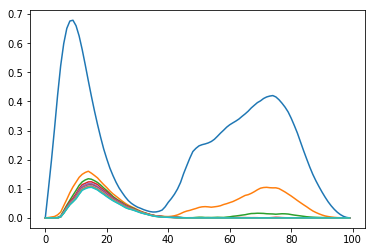

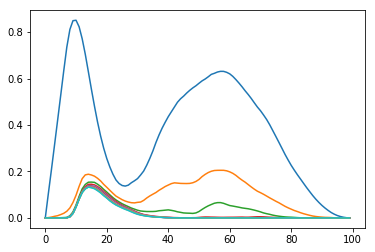

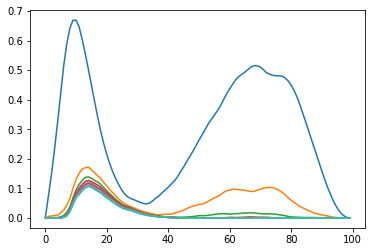

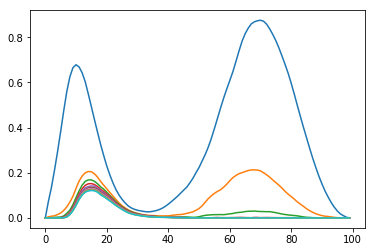

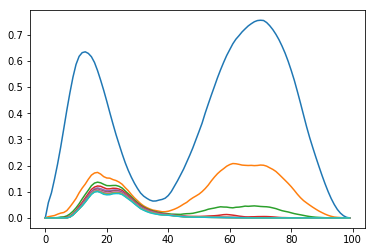

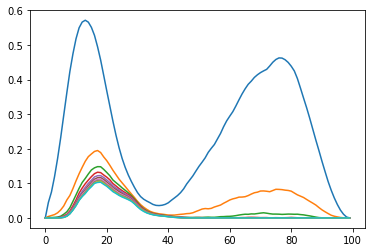

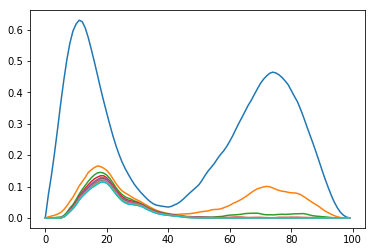

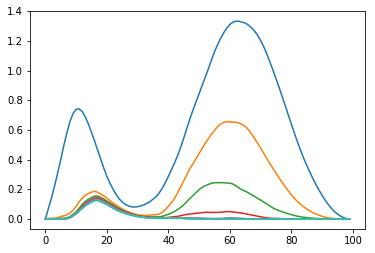

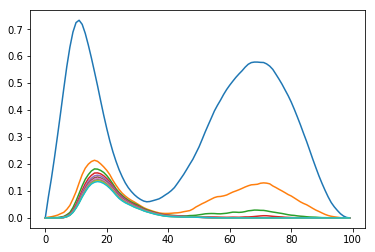

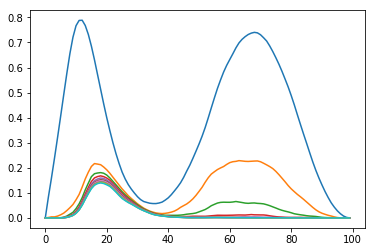

In [14]:
by = 100
for L in class_landscapes:
    for i in range(0,L.shape[1],by):
        plt.plot(L[0][i:i+by])
    plt.show()

In [16]:
for i in range(len(class_landscapes)):
    for j in range(len(class_landscapes)):
        d = np.linalg.norm(class_landscapes[i]-class_landscapes[j], ord=2)
        print('Class {}-{}: {}'.format(i,j,d))

Class 0-0: 0.0
Class 0-1: 2.2091473450494594
Class 0-2: 0.7290776137568202
Class 0-3: 2.056959400602974
Class 0-4: 2.1620687979859237
Class 0-5: 1.089667416519668
Class 0-6: 0.9130492151507167
Class 0-7: 5.449814457755038
Class 0-8: 1.2008515106344446
Class 0-9: 2.0341614915830935
Class 1-0: 2.2091473450494594
Class 1-1: 0.0
Class 1-2: 2.000848203657808
Class 1-3: 2.606701444855848
Class 1-4: 2.343695679283777
Class 1-5: 2.638207351964365
Class 1-6: 2.632986242128722
Class 1-7: 4.278808421629914
Class 1-8: 1.9498553148650588
Class 1-9: 2.1392875234737843
Class 2-0: 0.7290776137568202
Class 2-1: 2.000848203657808
Class 2-2: 0.0
Class 2-3: 1.4842591847669238
Class 2-4: 1.613140262263348
Class 2-5: 1.0636286104537391
Class 2-6: 1.0569161983600601
Class 2-7: 4.918055772604717
Class 2-8: 0.7975501307620186
Class 2-9: 1.5616063277538608
Class 3-0: 2.056959400602974
Class 3-1: 2.606701444855848
Class 3-2: 1.4842591847669238
Class 3-3: 0.0
Class 3-4: 1.1625979605903436
Class 3-5: 2.06756775040

In [23]:
for i in range(len(class_landscapes)):
    for j in range(len(class_landscapes)):
        cl_df = res_df[res_df['class'] == j]
        d = np.linalg.norm(class_landscapes[i] - cl_df['landscape'], ord=2)
        print('Class {}-{}: {}'.format(i,j,d.mean()))

Class 0-0: 1.6178871246854556
Class 0-1: 2.219859783966429
Class 0-2: 1.9424610238198798
Class 0-3: 1.9565358346309003
Class 0-4: 2.2812955182955252
Class 0-5: 1.6772626402028306
Class 0-6: 1.737944530912152
Class 0-7: 3.1538312136736266
Class 0-8: 1.976575746968695
Class 0-9: 2.274486341514363
Class 1-0: 1.815498694382803
Class 1-1: 2.066636792179141
Class 1-2: 2.0693820991003213
Class 1-3: 2.076403083325751
Class 1-4: 2.31375413097939
Class 1-5: 1.878004927541196
Class 1-6: 1.9526008244773196
Class 1-7: 2.994716921004316
Class 1-8: 2.0600789617178847
Class 1-9: 2.2967958025551627
Class 2-0: 1.6363566171762562
Class 2-1: 2.195926822844697
Class 2-2: 1.9258894654497607
Class 2-3: 1.917531869411429
Class 2-4: 2.2286548415446674
Class 2-5: 1.6734570156715423
Class 2-6: 1.7460959056844159
Class 2-7: 3.079849025908589
Class 2-8: 1.95311874701961
Class 2-9: 2.2314582440291577
Class 3-0: 1.7140189522429927
Class 3-1: 2.2486142727369014
Class 3-2: 1.971571703570591
Class 3-3: 1.87588164094405

In [25]:
from sklearn.linear_model import LogisticRegression

In [38]:
X = []
for i in range(res_df.shape[0]):
    X.append(res_df['landscape'].iloc[i][0])
X = np.array(X)

In [45]:
X_train = X[:-1000]
y_train = res_df['class'].iloc[:-1000].values
print(X_train.shape, y_train.shape)
clf = LogisticRegression(max_iter=1e5, random_state=0, multi_class='multinomial', solver='lbfgs').fit(X_train, y_train)

(4000, 1000) (4000,)


In [49]:
X_test = X[-1000:]
y_test = res_df['class'].iloc[-1000:].values
preds = clf.predict(X_test)

In [78]:
import sklearn_tda as tda

diags = np.array([pt.death,pt.birth] for pt in dgms[0] for dgms in res_df['diagrams'])
SW = tda.SlicedWassersteinKernel(num_directions=100, bandwidth=1.)
X = SW.fit([diags])

In [79]:
dgms2 = np.array([pt.death,pt.birth] for pt in dgms[0] for dgms in res_df['diagrams'])
Y = SW.transform([dgms2])

AttributeError: 'list' object has no attribute 'shape'